In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

###The K-means cost function

$$\sum_{i=1}^n min_k ||x_i - c_j||^2 $$

where: \
 $x_i =$ every point in the cluster other than the centroid. \
 $c_j =$ the centroid.

###K-means steps:

1. Pick cluster centers . These can be chosen randomly, or by some
other method.
2. For each , define the cluster as the set of points in that are closest to
center.
3. For each , redefine to be the center of mass of cluster.
4. Repeat (i.e., go to Step 2) until convergence.

###Coding the K-means algorithm following the steps above

####Generating data points

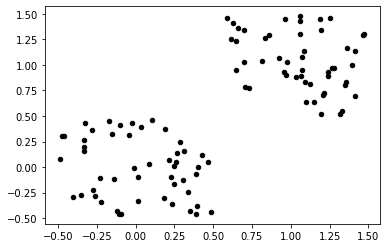

In [4]:
X= -0.5 + np.random.rand(100,2)
X1 = 0.5 + np.random.rand(50,2)
X[50:100, :] = X1
plt.scatter(X[ : , 0], X[ :, 1], s = 20, c = 'k')


####Randomly defining centroids

In [5]:
centroids = np.random.rand(2,2)
centroids

array([[0.06019154, 0.25021986],
       [0.21107635, 0.33894566]])

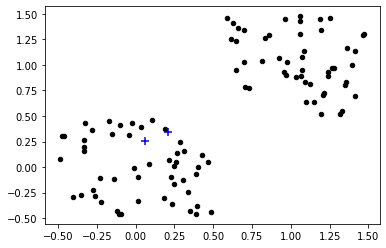

In [6]:
plt.scatter(X[ : , 0], X[ :, 1], s = 20, c = 'k')
plt.scatter(centroids[:,0],centroids[:,1],s = 50, c = 'b',marker = '+')


###Computing the distance between the first centroid and the points

In [8]:
dist = np.linalg.norm(X - centroids[0,:],axis=1).reshape(-1,1)
print(dist)

[[0.38329587]
 [0.56280792]
 [0.28609783]
 [0.4224494 ]
 [0.35687882]
 [0.22751023]
 [0.21669363]
 [0.52138987]
 [0.73743303]
 [0.63796982]
 [0.13978062]
 [0.41464173]
 [0.30495209]
 [0.22503918]
 [0.57906994]
 [0.19547398]
 [0.7051465 ]
 [0.5728917 ]
 [0.53648812]
 [0.56296699]
 [0.72802284]
 [0.39001052]
 [0.17848613]
 [0.65869796]
 [0.71241453]
 [0.42082585]
 [0.45143679]
 [0.38963461]
 [0.22617259]
 [0.34855136]
 [0.23554222]
 [0.26447201]
 [0.12208172]
 [0.61941348]
 [0.66787948]
 [0.26727577]
 [0.78046858]
 [0.45223895]
 [0.7217184 ]
 [0.22068893]
 [0.45769273]
 [0.40524117]
 [0.45952317]
 [0.80580194]
 [0.39470371]
 [0.30886141]
 [0.71752181]
 [0.45230844]
 [0.58012668]
 [0.24052292]
 [1.26489055]
 [1.20130332]
 [1.18313324]
 [0.83220532]
 [1.09118601]
 [1.25791226]
 [1.69597862]
 [1.12826431]
 [1.26933066]
 [1.24981634]
 [1.34368293]
 [1.41227519]
 [1.11737352]
 [1.59035848]
 [0.84982574]
 [1.35421747]
 [1.29141993]
 [1.45178976]
 [1.53152388]
 [1.58050007]
 [1.75021369]
 [1.41

###Computing the distance between the 2nd centroid and the points

In [9]:
dist = np.append(dist,np.linalg.norm(X - centroids[1,:],axis=1).reshape(-1,1),axis=1)
dist[:10,:]

array([[0.38329587, 0.43327509],
       [0.56280792, 0.59230735],
       [0.28609783, 0.29509997],
       [0.4224494 , 0.54182971],
       [0.35687882, 0.49123209],
       [0.22751023, 0.1217113 ],
       [0.21669363, 0.16277904],
       [0.52138987, 0.66996564],
       [0.73743303, 0.77976488],
       [0.63796982, 0.70313096]])

####assigning points to clusters based on distance to the centroids

In [10]:
classes = np.argmin(dist,axis=1)
classes

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

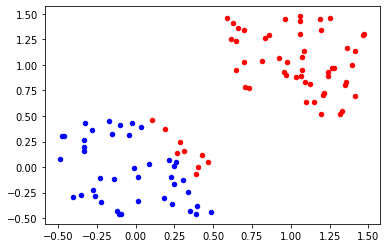

In [12]:
plt.scatter(X[classes == 0, 0], X[classes == 0, 1], s = 20, c = 'b')
plt.scatter(X[classes == 1, 0], X[classes == 1, 1], s = 20, c = 'r')

####Redifining the clusters
Now we update the position of each centroid, by calculating it at the mean position of the cluster. For instance, if a certain point has the points (1,0), (2,1) and (0.5,0.5), then the updated position of the centroid is:

$$c_j = ((1+2+0.5)/3) + ((0+1+0.5)/3) $$

In [19]:
for class_ in set(classes):
    centroids[class_,:] = np.mean(X[classes == class_,:],axis=0)
centroids


array([[ 0.02339597, -0.00693613],
       [ 1.06090003,  1.03679825]])

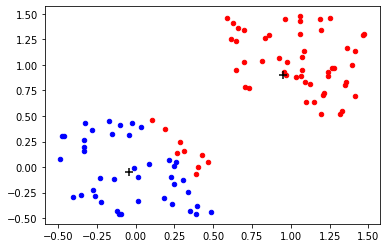

In [14]:
plt.scatter(X[classes == 0, 0], X[classes == 0, 1], s = 20, c = 'b')
plt.scatter(X[classes == 1, 0], X[classes == 1, 1], s = 20, c = 'r')
plt.scatter(centroids[:,0],centroids[:,1],s = 50, c = 'k',marker = '+')


###The complete algorithm

In [15]:
class KMeans:
    def __init__(self,k):
        self.k = k

    def train(self,X,MAXITER = 100, TOL = 1e-3):
        centroids = np.random.rand(self.k,X.shape[1])
        centroidsold = centroids.copy()
        for iter_ in range(MAXITER):
            dist = np.linalg.norm(X - centroids[0,:],axis=1).reshape(-1,1)
            for class_ in range(1,self.k):
                dist = np.append(dist,np.linalg.norm(X - centroids[class_,:],axis=1).reshape(-1,1),axis=1)
            classes = np.argmin(dist,axis=1)
            # update position
            for class_ in set(classes):
                centroids[class_,:] = np.mean(X[classes == class_,:],axis=0)
            if np.linalg.norm(centroids - centroidsold) < TOL:
                break
                print('Centroid converged')
        self.centroids = centroids
    
    def predict(self,X):
        dist = np.linalg.norm(X - self.centroids[0,:],axis=1).reshape(-1,1)
        for class_ in range(1,self.k):
            dist = np.append(dist,np.linalg.norm(X - self.centroids[class_,:],axis=1).reshape(-1,1),axis=1)
        classes = np.argmin(dist,axis=1)
        return classes

In [16]:
kmeans = KMeans(2)
kmeans.train(X)

In [17]:
classes = kmeans.predict(X)
classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

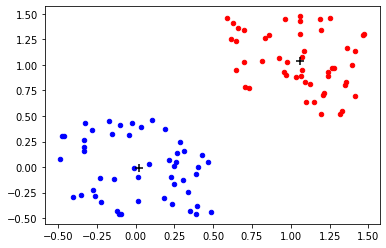

In [18]:
plt.scatter(X[classes == 0, 0], X[classes == 0, 1], s = 20, c = 'b')
plt.scatter(X[classes == 1, 0], X[classes == 1, 1], s = 20, c = 'r')
plt.scatter(kmeans.centroids[:,0],kmeans.centroids[:,1],s = 50, c = 'k',marker = '+')
